# DLSP25U: Introduction to Deep Learning

**Name:** Sara Vargas


**Instructions:**

In this notebook, you will be asked to write code and answer questions.  
Place all responses under the **Solution** headers.

---

This first assignment is aimed at coding a perceptron from scratch in order to learn how this
simple but powerful linear binary classifier works. Hereafter we import some useful libraries and set the random seed for reproducibility.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SEED = 0
np.random.seed(SEED)

## The perceptron

The perceptron is the simplest form of a neural network used for the classification of data said to be linearly separable (i.e., data that lie on opposite sides of a hyperplane). It consists of a linear combination of the input features, followed by a hard limiter like the heaviside function or the sign function defined as:
$$
\begin{equation*}
    \text{Heaviside}(s) = \begin{cases} 1 & \text{if } s \geq 0 \\ 0 & \text{if } s < 0 \end{cases}
\end{equation*}
$$
or, using the Iverson bracket notation:
$$
\begin{equation*}
    \text{Heaviside}(s) = [s \geq 0]
\end{equation*}
$$

<p align="center">
  <img src="https://www.intmath.com/laplace-transformation/svg/svgphp-unit-step-functions-definition-1a-s0.svg" alt="Image description" />
</p>

As a consequence we can formalize the perceptron predictor in the following way.

Let $x$ be the object we want to classify and $\boldsymbol{f}(x)$ be the feature vector in $\mathbb{R}^N$. This means that $\boldsymbol{f}$ *extracts* the features from the object $x$, i.e. $\boldsymbol{f}(x)$ is the so-called *feature extractor*.
Moreover, let $\boldsymbol{w} \in \mathbb{R}^N$ be the synaptic weights vector, $b \in \mathbb{R}$ the externally applied bias term and $[s \geq 0]$ the hard limiter function. The perceptron predictor is defined as:
$$
\begin{equation*}
    \tilde{y} = [\boldsymbol{w}^\top \boldsymbol{f}(x) + b \geq 0]
\end{equation*}
$$
Often, we will include the bias term into the weights vector by adding a constant 1 to the feature vector $\boldsymbol{f}(x)$, so that the perceptron predictor becomes:
$$
\begin{equation*}
    \tilde{y} = [\boldsymbol{w}^\top \boldsymbol{f}(x) \geq 0]
\end{equation*}
$$

The goal is to classify correctly the input data in the classes $\mathcal{C}_1$ and $\mathcal{C}_2$.

The update rule for the perceptron is:
$$
    \boldsymbol{w} \leftarrow \boldsymbol{w}
$$
if the predicted label is correct, otherwise:
$$
\begin{equation*}
    \boldsymbol{w} \gets \begin{cases} \boldsymbol{w} - \boldsymbol{f}(x) \quad \text{ if } \boldsymbol{w}^\top \boldsymbol{f}(x) \geq 0
    \\ \boldsymbol{w} + \boldsymbol{f}(x) \quad \text{ if } \boldsymbol{w}^\top \boldsymbol{f}(x) < 0 \end{cases}
\end{equation*}
$$

One can rewrite the update rule more elengantly in the following way:
$$
\begin{equation*}
    \boldsymbol{w} \gets \boldsymbol{w} + (y - \tilde{y}) \boldsymbol{f}(x)
\end{equation*}
$$

where $y$ is the true label, i.e. the desired output of the perceptron. From now on we will compact the notation by denoting $\boldsymbol{f} = \boldsymbol{f}(x)$. 

The first task is to implement the perceptron algorithm in Python. Hereafter you have a template for the class `Perceptron`. You have to implement the methods `train` and `predict`.
- the method `train` should implement the perceptron learning algorithm and take as input the training dataset. Then process all the pairs $(\boldsymbol{f}, y)$ once updating the weights accordingly
- the method `predict` should take as input a data point `f` and return the predicted label

In [2]:
class NotImplementedPerceptron:
    def __init__(self, n_features):
        # You can either include the bias term in the weights vector or not
        # but consider adapting the predict method accordingly
        self.w = np.zeros(n_features)
        self.b = 0

    def predict(self, f):
        raise NotImplementedError

    def train(self, F, y):
        raise NotImplementedError

**Solution**

In [16]:
class Perceptron:
    def __init__(self, n_features):
        self.w = np.zeros(n_features)
        self.b = 0

    def predict(self, f):
        if np.dot(self.w, f)+ self.b >0:
            return 1
        else: 
            return 0
    
    def train(self, F, y):#implement perceptron learning algo
        #training set is the input 
        loss=[]
        for j in range(50):
            for f, label in zip(F, y):
                update= label - self.predict(f)
                self.w+= update*f
                self.b+=update
        
                if update!=0: 
                    loss.append(1)
                else: 
                    loss.append(0)
        #returns the average loss of the training 
        #loss function -> if label right +0 loss 
                        # -> if label wrong +1 loss
        avgloss=  sum(loss)/len(loss)
       # self.b = np.clip(self.b, -5, +5)
        return avgloss
       



## Exercise 1

### 1.1 Synthetic dataset generation

We will generate a dataset $D = \{ \boldsymbol{f}_n, y_n \}_{n=1}^{N=200}$ where $\boldsymbol{f}_n \in \mathbb{R}^2$ and $y_n \in \{0, 1\}$.
The dataset will be generated in the following way:
$$\boldsymbol{f}_n \sim \begin{cases}
\mathcal{N}\left(\begin{pmatrix}1 \\ 0\end{pmatrix}, \sigma^2 \mathbb{I}_2 \right) & \text{if } y_n = 1 \\
\mathcal{N}\left(\begin{pmatrix}-1 \\ 0\end{pmatrix}, \sigma^2 \mathbb{I}_2 \right) & \text{if } y_n = 0
\end{cases}
$$

The function `generate_dataset` does exactly this and you do not have to modify it.

In [17]:
def generate_dataset(
    n_samples = 200,
    sigma = 1,
    mean_positive = np.array([1, 0]),
    mean_negative = np.array([-1, 0]),
):
    # Generate covariance matrix
    covariance_matrix = sigma**2 * np.eye(2)

    # Generate labels
    y = np.random.choice([0, 1], size=n_samples)

    # Generate data points based on labels
    F = np.array([
        np.random.multivariate_normal(mean_positive, covariance_matrix) if label == 1 
        else np.random.multivariate_normal(mean_negative, covariance_matrix) 
        for label in y
    ])

    return F, y

An example of a generated dataset is shown below.

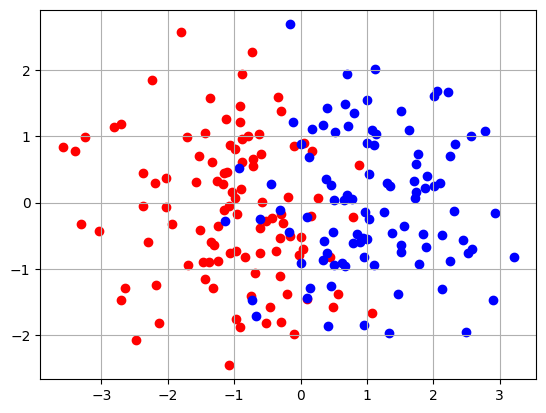

In [18]:
F, y = generate_dataset(sigma=1)
plt.scatter(F[y==0][:, 0], F[y==0][:, 1], color='red')
plt.scatter(F[y==1][:, 0], F[y==1][:, 1], color='blue')
plt.grid()
plt.axis('equal')
plt.show()

### 1.2 Computational complexity

Before implementing the perceptron, let's evaluate the computational complexity of the perceptron in terms of arithmetic operations per iteration.
What is the worst case asymptotic time complexity of the perceptron algorithm?

**Solution**

The computational complexity takes into account predicting for every m data point in F by multiplying all n features by n features of weight. Thsi is already O(mn). 
Then for each data point when training, we potentially update the weights vector. 
Therefore the computational complexity is O(mn)

Worst case is O(mn)

### 1.3 Decision boundary

The decision boundary of the perceptron is the hyperplane defined by the equation $\boldsymbol{w}^\top \boldsymbol{f} = 0$ that splits (or tries to) the data points in two regions.
When working with two-dimensional data, the decision boundary is an easily visualizable line.

Generate a random dataset with $N=200$ samples and $\sigma=0.5$, then plot the data points and the decision boundary of the perceptron.

**Solution**

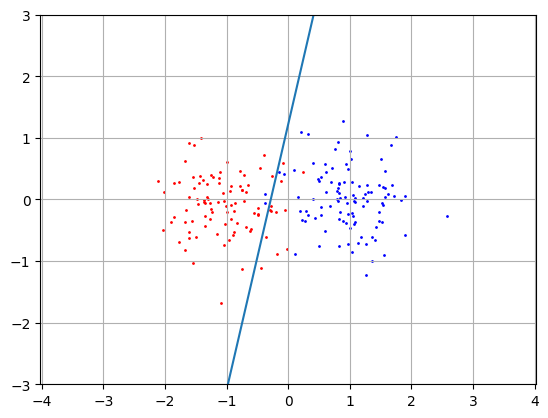

In [19]:
def plot(F, y, perceptron):
 
    plt.scatter(F[y == 0][:, 0], F[y == 0][:, 1], color='red',s = 1)
    plt.scatter(F[y == 1][:, 0], F[y == 1][:, 1], color='blue',s = 1)
    weights= perceptron.w
    b= perceptron.b
    
    ##To plot the decision boundary we have to use weightsTf=0
    #w1*f1 + w2*f2 + b =0
    #we are in the feature space so our x : f1 and y: f2
    w1=weights[0]
    w2= weights[1]
    #x= F[:,0]
    #y=F[:,1]
    #y= np.dot(w2, (-np.dot(w1,x)-bias))
    x = np.linspace(-3,3,100)
    plt.plot(x, -w1/w2 * x +b/w2)
    plt.grid()
    plt.axis('equal')
    plt.ylim(-3,3)
    plt.show()


Ff, yy = generate_dataset(sigma=0.5)
num_features=Ff.shape[1]
perceptronn = Perceptron(num_features)
perceptronn.train(Ff, yy)

plot(Ff,yy,perceptronn)






### 1.4 Error analysis

Now we focus on the error analysis of the predictions of the perceptron.

#### 1.4.1 Variance in the inputs

Consider three different values of $\sigma = \{0.04, 0.5, 0.75\}$. For each value of $\sigma$:
1. Run the perceptron over 50 randomly generated datasets
2. For each of these datasets, train the perceptron, make it predict the labels of the same data points and compute the mean of the errors using as error function $e(y, \tilde{y}) = \left[ y \neq \tilde{y} \right]$. The mean of the errors can be estimated with the `np.mean` function.
3. For each of the sigma values, print the mean and the standard deviation of the errors. Then plot the distribution of the errors for each value of $\sigma$. What happens when $\sigma$ increases? What is the reason for this?

**Solution**

0.04


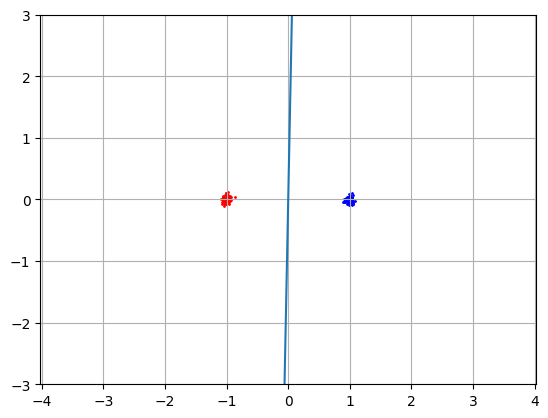

0.5


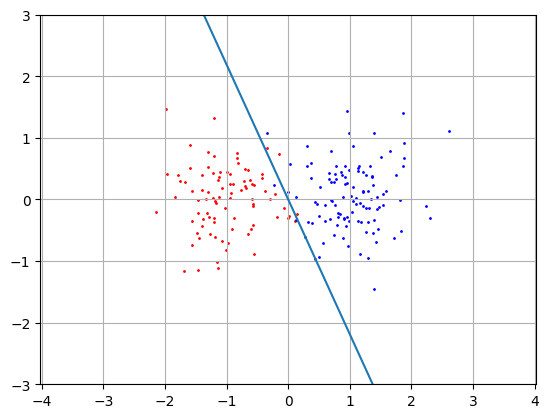

0.75


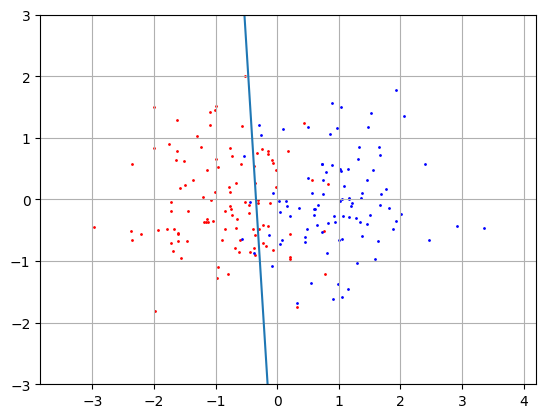

Mean error for sigma=0.04 => 0.000200
Standard deviation for sigma=0.04 =>0.000000

Mean error for sigma=0.5 => 0.032418
Standard deviation for sigma=0.5 =>0.015344

Mean error for sigma=0.75 => 0.129092
Standard deviation for sigma=0.75 =>0.029198



In [20]:
three_avg_losses=[]
three_stdev=[]
sigmas= [0.04, 0.5, 0.75]
for s in sigmas:
    fifty_avglosses_Onesigma=[]
    for i in range (0, 50):
        F, y = generate_dataset(sigma=s)
        perceptron = Perceptron(F.shape[1])
        training_avgloss=perceptron.train(F, y) 
        fifty_avglosses_Onesigma.append(training_avgloss)
        if i==0:
            print(s)
            plot(F,y,perceptron)

    
    three_avg_losses.append(np.mean(fifty_avglosses_Onesigma))
    three_stdev.append(np.std(fifty_avglosses_Onesigma)) 


for i in range(0,3):
    print(f"Mean error for sigma={sigmas[i]} => {three_avg_losses[i]:4f}")
    print(f"Standard deviation for sigma={sigmas[i]} =>{three_stdev[i]:4f}")
    print()


        

Interpretation of the results
* As sigma increases the mean error increases
* When sigma is 0.04 it is close to the mean as their standard deviation is low. This indicates the dataset is more linearly separable and therefore the perceptron will perform better than with datasets with higher sigma values like 0.75.
* As sigma increases standard deviation of the errors increases: this implies the errors are less and less consistent as the sigma increases. For each training run, when the standard deviation of the data set is low, the standard deviation of the errors is low, meaning the errors are consistent in each training run. Whereas as the sigma increases the errors are less consistent in each training run.



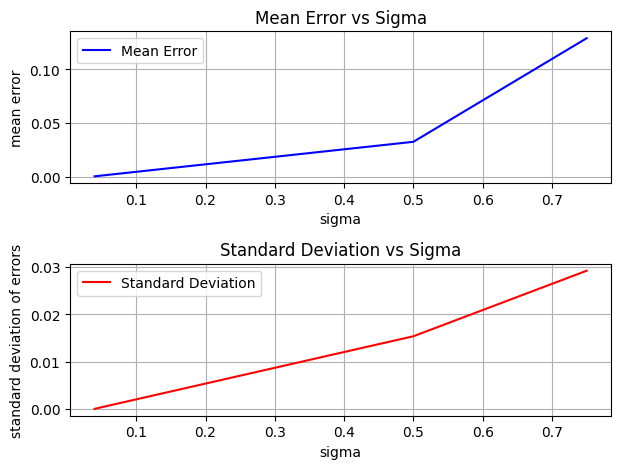

In [21]:
#Plotting the avg errors and the standard deviation of the errors at different sigma values of the data set: 
import matplotlib.pyplot as plt
import numpy as np


#mean error vs sigma
plt.subplot(2, 1, 1) 
plt.plot(sigmas, three_avg_losses, color='b', label='Mean Error')
plt.xlabel('sigma')
plt.ylabel('mean error')
plt.title('Mean Error vs Sigma')
plt.grid(True)
plt.legend()


# Second subplot (Standard Deviation vs Sigma)
plt.subplot(2, 1, 2) 
plt.plot(sigmas, three_stdev,  color='r', label='Standard Deviation')
plt.xlabel('sigma')
plt.ylabel('standard deviation of errors')
plt.title('Standard Deviation vs Sigma')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



### 1.4.2 Variance in the labels
Generate one more dataset with $\sigma = 0.15$. To make our dataset noisier we consider the possibility of flipping some labels. Consider these label flipping probabilities: $p = \{0.05, 0.15, 0.25\}$.
Repeat the previous experiment keeping the newly generateed dataset fixed, but flipping the labels with the given probabilities.
Print the errors and plot the distribution of the error statistic. What can we say about the error distribution when $p$ increases?

*Hint*: write a function `flip_labels` that takes as input the labels and the probability $p$ and returns the flipped labels and then use it in the experiment.

**Solution**

no flips


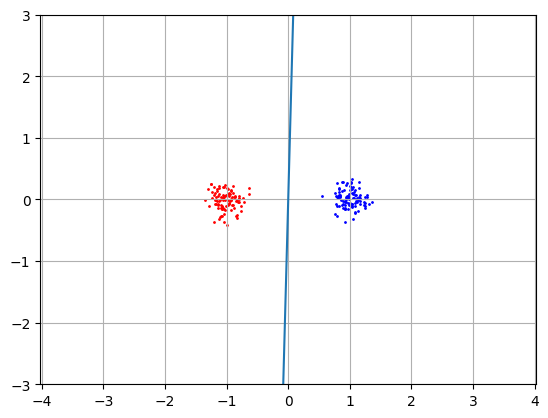

Mean error for pflip=0.05 => 0.097604
Standard deviation for pflip=0.05 =>        0.029261

Mean error for pflip=0.15 => 0.248726
Standard deviation for pflip=0.15 =>        0.034764

Mean error for pflip=0.25 => 0.375828
Standard deviation for pflip=0.25 =>        0.034669



In [22]:
F, y = generate_dataset(sigma=0.15)
perceptron = Perceptron(F.shape[1])
training_avgloss=perceptron.train(F, y)
print("no flips")
plot(F,y,perceptron)

three_avg_losses=[]
three_stdev=[]
probabilities= [0.05, 0.15, 0.25]


def flip_labels(y, flip_prob):
    y_flipped = y.copy()
    
    for i in range(len(y_flipped)):  # Loop through each label
        x = np.random.rand()
        if x < flip_prob:  #this basically does a bernoulli trial with probability of being true is flip_prob
            y_flipped[i] = 1 - y[i]  #If it is true then we flip the sign 
                                            # if y  is 1 then yflipped 0= 1-1 , if y was 0 then its 1 now
    return y_flipped


#loop over every probability of flipping 
for flip_prob in probabilities:
   # print(flip_prob)
    fifty_avglosses=[] 
  
 
    for i in range (0, 50):
        aperceptron = Perceptron(F.shape[1])
        flipped_y= flip_labels(y, flip_prob)
        training_avgloss=aperceptron.train(F, flipped_y) 
        fifty_avglosses.append(training_avgloss)
        
        
    #print(fifty_avglosses)
    three_avg_losses.append(np.mean(fifty_avglosses))
    three_stdev.append(np.std(fifty_avglosses)) 



for i in range(0,3):
    print(f"Mean error for pflip={probabilities[i]} => {three_avg_losses[i]:4f}")
    print(f"Standard deviation for pflip={probabilities[i]} =>{three_stdev[i]:16f}")
    print()




Interpretation: 

As the probability of flipping the labels increases, making our dataset noisier as p_flip increases, we see both mean training error and standard deviation of training error increases. 
* As the dataset becomes noisier the perceptron struggles to make a decision boundary so the mean error increases. Since the flips make the dataset less linearly separable. So for lower probabilities of random flipping of the label, the dataset is more linearly separable than that of datasets with higher probability of flipping as it injects more noise making the dataset less linearly separable. 
* The standard deviation also varies but and it tends to increase since in each training run the error rate is less consistent as the dataset is noisier. 

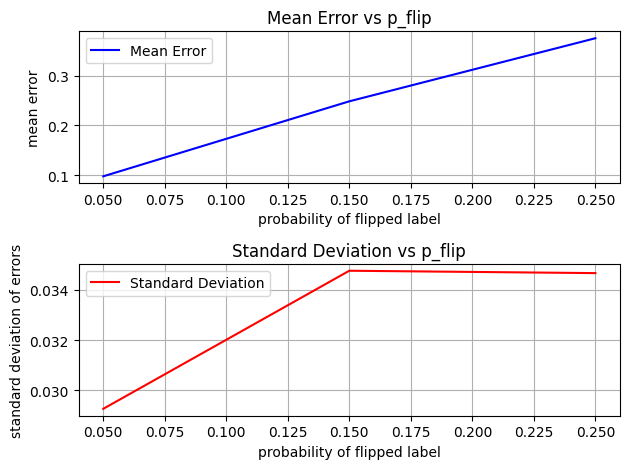

In [23]:
#Plotting the avg errors and the standard deviation of the errors at different sigma values of the data set: 
import matplotlib.pyplot as plt
import numpy as np


#mean error vs sigma
plt.subplot(2, 1, 1) 
plt.plot(probabilities, three_avg_losses, color='b', label='Mean Error')
plt.xlabel('probability of flipped label')
plt.ylabel('mean error')
plt.title('Mean Error vs p_flip')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2) 
plt.plot(probabilities, three_stdev,  color='r', label='Standard Deviation')
plt.xlabel('probability of flipped label')
plt.ylabel('standard deviation of errors')
plt.title('Standard Deviation vs p_flip')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



## Exercise 2

Now we are going to use real world data. We will use the Iris dataset, which is a popular dataset in machine learning. The dataset consists of 50 samples from each of three species of Iris flowers:

0. Iris setosa, *setosa*
1. Iris versicolor, *versicolor*
2. Iris virginica, *virginica*

For each sample, four features are given:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

### 2.1 Load the dataset

The `sklearn` library easily allows us to load the Iris dataset with the function `load_iris` from the `datasets` submodule. Moreover, we split the dataset into a training set and a test set. The `train_test_split` function from `sklearn.model_selection` can be used for this purpose. We split the dataset into 80% training data and 20% test data, making sure that the classes are balanced (see the `stratify` parameter).

**Solution**

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data 
y = iris.target  

X_train,X_test,y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y)

print(f"Training set size:{X_train.shape[0]} samples")
print(f"Test set size:{X_test.shape[0]} samples")


Training set size:120 samples
Test set size:30 samples


### 2.2 Binary classification

Now, in turn, discard one of the three classes and run the perceptron on the remaining two. 
Then, Compute the accuracy of the perceptron both on the training set and on the test set. Keep track of the three vectors of weights.

Analyze the accuracy of the perceptron on the training set and on the test set for each couple of classes. Is the performance of the perceptron equally good for all the pairs of classes?


*Note*: the accuracy can be computed with the `accuracy_score` function from `sklearn.metrics` or simply by computing the mean of the correct predictions.

*Hint*: consider the following code flow:
- compute possible pairs of classes
- for each pair of classes:
    - discard the third class
    - ensure the classes have values 0 and 1 (instead of 1 and 2 or 0 and 2)
    - train the perceptron and save the weights in a separate list
    - compute the accuracy on the training set and on the test set
- print the results


**Solution**

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

classes=[0,1,2]
weights = []
biases=[]

for i in classes:
    #skip i
    X_skipi = X[(y!=i)]
    y_skipi = y[y!=i]
    fclasses= list(set(y_skipi)) 
    if y_skipi[0] == 1:
        for i in range(len(y_skipi)):
            if y_skipi[i] == 1:
                y_skipi[i]=0
            if y_skipi[i] == 2:
                y_skipi[i]=1
    else: 
        for i in range(len(y_skipi)):
            if y_skipi[i] == 2:
                y_skipi[i]=1

    #print(y_skipi)
    #TRAIN PERCEPTRON
    X_train, X_test, y_train, y_test = train_test_split(X_skipi, y_skipi, test_size=0.2, stratify=y_skipi)
    
    #print(X_train.shape[0])
    perceptron = Perceptron(X_train.shape[1])
    avgtrainloss= perceptron.train(X_train,y_train )
    weights.append(perceptron.w)
    biases.append(perceptron.b)
    training_loss = 0
    test_loss = 0
    for i in range(len(X_train)):
        
        if np.dot(perceptron.w,X_train[i])+perceptron.b > 0:
            pred_y = 1
        else:
            pred_y = 0
        training_loss += np.abs(pred_y-y_train[i])

    for i in range(len(X_test)):
        if np.dot(perceptron.w,X_test[i])+perceptron.b > 0:
            pred_y = 1
        else:
            pred_y = 0
        test_loss += np.abs(pred_y-y_test[i])
    
    

    print(f"\nClasses {fclasses[0]} vs {fclasses[1]}:")
    print(f"Training Accuracy: {1-(training_loss/len(y_train)):.4f}")
    print(f"Test Accuracy: {1-(test_loss/len(y_test)):.4f}")

    


print("\nThe 3 different weights")
for each in weights: 
    print(each)



Classes 1 vs 2:
Training Accuracy: 1.0000
Test Accuracy: 0.9000

Classes 0 vs 2:
Training Accuracy: 1.0000
Test Accuracy: 1.0000

Classes 0 vs 1:
Training Accuracy: 1.0000
Test Accuracy: 1.0000

The 3 different weights
[-6.  -3.6  8.2  6.1]
[-1.1 -3.4  7.1  3.7]
[-1.9 -5.2  9.7  4.6]


#### 2.3 Feature importance

Now we are going to analyze the weights of the perceptrons trained in the previous step. 

Suppose for the moment that each dimension of the feature vector $\boldsymbol{f}$ varies similarly. As a consequence we can consider the absolute value of the weights as a measure of the importance of the features. Even if this is not true don't worry, we are just making a simplification.

Print the weights of the perceptrons and analyze the importance of the features. Which are the two most important features for each pair of classes?

**Solution**

In [26]:
classpairs = ((1,2), (0,2), (0,1))

featureimportances=[]
for i, (class1, class2) in enumerate(classpairs):
    print(f"\nFeature importance for Classes {class1} vs {class2}:")
    absweights = np.abs(weights[i])
    featureimportances.append(absweights)
    
    for x, abweight in enumerate(absweights):
        print(f"  Feature {x+1} importance: {abweight:.2f}")
        


Feature importance for Classes 1 vs 2:
  Feature 1 importance: 6.00
  Feature 2 importance: 3.60
  Feature 3 importance: 8.20
  Feature 4 importance: 6.10

Feature importance for Classes 0 vs 2:
  Feature 1 importance: 1.10
  Feature 2 importance: 3.40
  Feature 3 importance: 7.10
  Feature 4 importance: 3.70

Feature importance for Classes 0 vs 1:
  Feature 1 importance: 1.90
  Feature 2 importance: 5.20
  Feature 3 importance: 9.70
  Feature 4 importance: 4.60



Versicolor vs Virginica: classes1vs 2  
- petal length is the most important feature followed by sepal width and petal width.
- Sepal length is the least important  

Setosa vs Virginica, classes 0 vs 2
- petal length is again the most important feature.
- - Sepal width also plays a role, while petal width and sepal length are less relevant.  

Setosa vs Versicolor: classes 0 vs 1
- petal length remains the most critical feature.
- Sepal width has some impact, while petal width and sepal length contribute less.

Petal length is the most useful feature for telling the species apart. Sepal width helps to some extent, while petal width has moderate importance. Sepal length is the least significant in classification.  

### 2.4 Decision boundary

The iris dataset is a four-dimensional dataset, hence the hyperplane that defines the decision boundary is three-dimensional. As a consequence, we cannot visualize it directly.
However, we can select two specific features and plot the decision boundary in the space of just these two. How to choose them? We can select the two most important features we found in the previous step.

Now, for each pair of classes, plot the decision boundary in the space of the two selected features.

**Solution**

these are the features
[6.  3.6 8.2 6.1]
we choose feature4 and feature 3


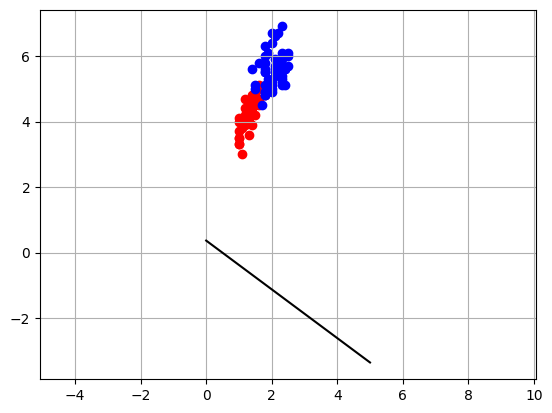

these are the features
[1.1 3.4 7.1 3.7]
we choose feature4 and feature 3


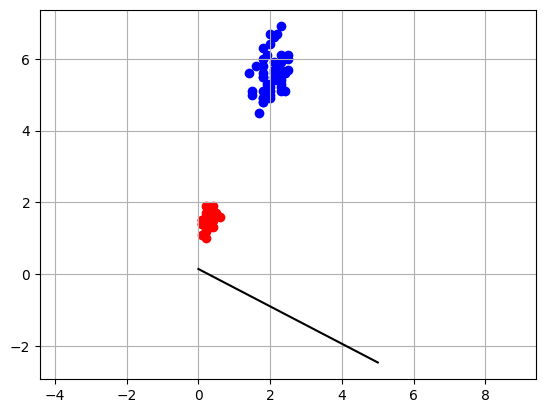

these are the features
[1.9 5.2 9.7 4.6]
we choose feature2 and feature 3


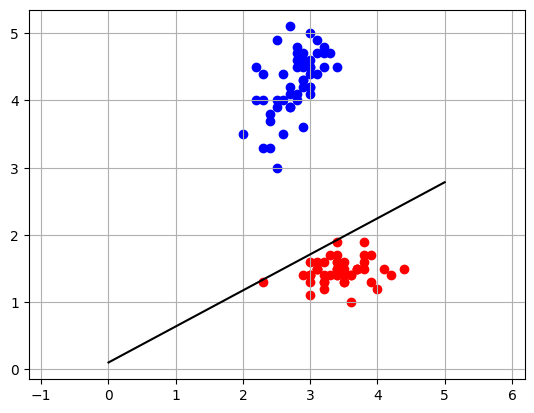

In [27]:

for idx, (class1, class2) in enumerate(classpairs):
    
    print('these are the features')
    print(featureimportances[idx])
    Ifeature1, Ifeature2 = np.argsort(featureimportances[idx])[-2:]

    print(f'we choose feature{Ifeature1 +1} and feature {Ifeature2+1}')


    X_selected = X[:, [Ifeature1, Ifeature2]]
    X_mask = X_selected[(y == class1) | (y == class2)]
    y_mask = y[(y == class1) | (y == class2)]
   
    val=y_mask[0]
    for i in range(0, len(y_mask)):
        if y_mask[i]==val:
            y_mask[i]=0
        else:
            y_mask[i]=1
             
    w=weights[idx]
    w1=w[Ifeature1]
    w2=w[Ifeature2]
    b = biases[idx]
  
    plt.scatter(X_mask[y_mask==0][:, 0], X_mask[y_mask==0][:, 1], color='red')
    plt.scatter(X_mask[y_mask==1][:, 0], X_mask[y_mask==1][:, 1], color='blue')
    x = np.linspace(-0,5,100)
    plt.plot(x, -w1/w2*x - b/w2, label= 'decision boundary', color="black")
    plt.grid()
    plt.axis('equal')
    plt.show()



### 2.5 Multi class classification

Now we are going to consider the three classes of the Iris dataset. Before proceding with the training, we must modify the perceptron to handle multi-class classification. The perceptron can be extended to multi-class classification using the one-vs-all strategy. In this strategy, we train a perceptron for each class, considering it as the positive class and all the other classes as the negative class. Then, we assign the class with the highest score.

Implement the methods `train` and `predict` for the class `MulticlassPerceptron` and remember to load again the Iris dataset, since we need all the classes. Notice that instead of defining three perceptrons or three weights vectors, we can define a single matrix of weights $\boldsymbol{W} \in \mathbb{R}^{\text{n\_classes} \times \text{n\_features}}$. If this disturbs you and you prefer to define three perceptrons, feel free to do so.

In [28]:
class MulticlassPerceptron:
    def __init__(self, n_features, n_classes):
        self.w = np.zeros((n_classes, n_features))
        self.n_classes = n_classes

    def predict(self, f):
        raise NotImplementedError

    def train(self, F, y):
        raise NotImplementedError

**Solution**

In [29]:
class MulticlassPerceptron:
    def __init__(self, n_features, n_classes):
        self.w = np.zeros((n_classes, n_features))
        self.n_classes = n_classes

    def predict(self, f):
        scores= np.dot(self.w, f) 
        best_class=0
        best_score= scores[0]
        for i in range(1,len(scores)):
            if scores[i]> best_score:
                best_score= scores[i]
                best_class= i
        return best_class

    def train(self, X, y):
        while True:
            mistakes= 0
            for i in range(len(X)):
                y_pred = self.predict(X[i])
                if y_pred != y[i]:
                    self.w[y[i]]+= X[i]
                    self.w[y_pred]-= X[i]
                    mistakes+= 1
            if mistakes< 10:
                break

iris= load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

perceptron = MulticlassPerceptron(n_features=X.shape[1],n_classes=3)
perceptron.train(X_train, y_train)

y_pred = np.array([perceptron.predict(f) for f in X_test])
accuracy = np.mean(y_pred == y_test)

print(f"Test accuracy: {accuracy * 100:.2f}%")



Test accuracy: 93.33%
